In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from playlist_genre_analyser import get_genres, get_playlist_tracks

#### Get genre distributions within Spotify playlists

In [2]:
Dub_til_Deafness = '3vjiicG2x1BLzYoBJMuUxz'
# WORKS!!! ~ 126 songs
chillin = '7s3ydZ859WmGIdT0L0SqCI'
# DOESN'T WORK  390 songs
Tempo_Shifts = '4mx3ap0S5mnYcLlH2x2Ms9'
# DOESN'T WORK 23 songs
Latam = '0gDCsskyDSMatCDon484r6'
# WORKS!!! ~ 113 songs

df = get_playlist_tracks(Latam)

In [3]:
df

,Track Name,Artist Name,Artist ID,Genre
0,Chan Chan,Buena Vista Social Club,11kBu957KTYoAltZHDm8gW,"bolero, latin, son cubano, latin jazz"
1,Desafinado,"Stan Getz, João Gilberto, Antônio Carlos Jobim","0FMucZsEnCxs5pqBjHjIc8, 77ZUbcdoU5KCPHNUl8bgQy...","samba, bossa nova, brazilian jazz, mpb, cool j..."
2,Guajira Ven - Demo,Orchestra Baobab,7xT0arvCDupDU1YYy0BNv9,afropop
3,Valse Gitane,Gipsy Kings,3jc496ljiyrS3ECrD7QiqL,flamenco
4,Bamboléo,Gipsy Kings,3jc496ljiyrS3ECrD7QiqL,flamenco
...,...,...,...,...
123,La Complicidad,Perotá Chingó,5cMTiWeaWidGI8hVoZY8Ox,latin folk
124,Alma Não Tem Cor,Perotá Chingó,5cMTiWeaWidGI8hVoZY8Ox,latin folk
125,Rie Chinito,Perotá Chingó,5cMTiWeaWidGI8hVoZY8Ox,latin folk
126,Postales,Federico Aubele,3FIFlkBCqeOewVa9hiNgwq,"downtempo, tango, trip hop"


#### Visualise the genre data in charts

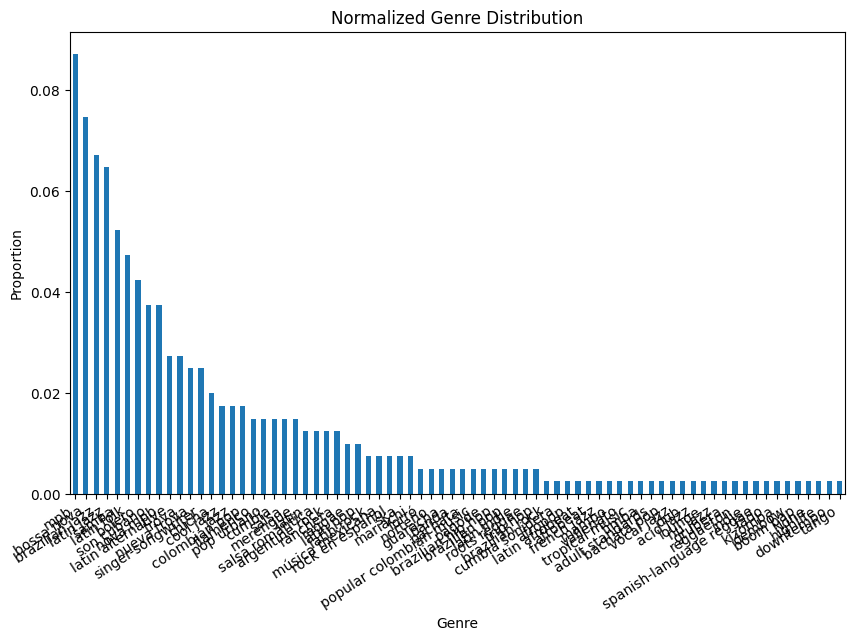

In [4]:
# Extract all genres into a list
all_genres = []
for genres in df['Genre']:
    all_genres.extend(genres.split(', '))

# Create a DataFrame of genre counts
genre_counts = pd.Series(all_genres).value_counts(normalize=True)

# Plot the normalized histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Normalized Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=33, ha='right')
plt.show()

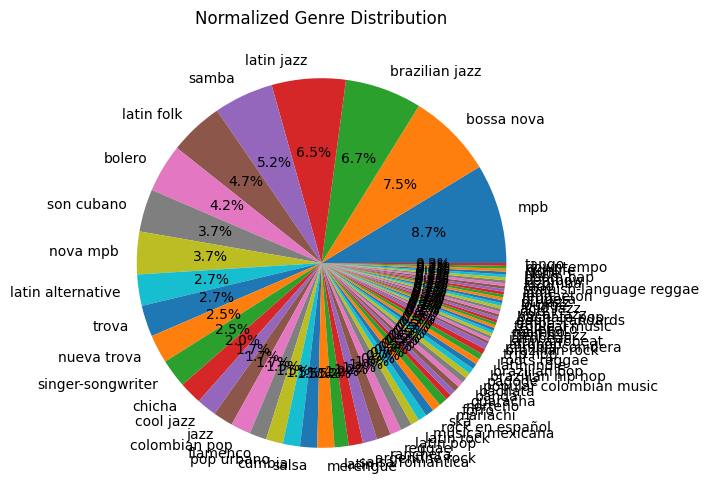

In [5]:
# Create a DataFrame of genre counts
genre_counts = pd.Series(all_genres).value_counts(normalize=True)

# Plot the normalized pie chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Normalized Genre Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

#### Filter songs by specific genres datasets

In [6]:
all_genres = genre_counts.index.to_series().reset_index(drop=True)
genre_str = all_genres.to_string(index= False)
#print(all_genres)

BrazPortug_Genres = ["bossa nova", "samba", "mpb", "brazilian jazz", "violao", "nova mpb", "manguebeat", "tropicalia", "samba-rock", "brazilian classical", "brazilian hip hop", "samba-jazz", "axe", "brazilian rock", "pagode novo", "nova musica carioca", "pagode", "velha guarda", "samba moderno", "brazilian reggae", "musica paraibana", "funk ostentacao", "samba de roda", "hip hop tuga", "r&b brasileiro", "pop rap brasileiro", "musica rondoniense", "musica alagoana", "brazilian soul", "roda de samba", "choro", "musica potiguar", "funk carioca", "umbanda", "rap nacional antigo", "bandolim", "partido alto", "samba-enredo", "boom bap brasileiro", "nova musica pernambucana", "brazilian boogie", "brasilia indie"]

# Normalize lists by stripping whitespace from all elements
BrazPortug_Genres = pd.Series([genre.strip() for genre in BrazPortug_Genres])
#normalized_all_genres = [genre.strip() for genre in all_genres]

# Select elements in BrazPortug_Genres that do not appear in all_genres
badly_written_genres = [genre for genre in BrazPortug_Genres if genre not in all_genres]

print(badly_written_genres)

['bossa nova', 'samba', 'mpb', 'brazilian jazz', 'violao', 'nova mpb', 'manguebeat', 'tropicalia', 'samba-rock', 'brazilian classical', 'brazilian hip hop', 'samba-jazz', 'axe', 'brazilian rock', 'pagode novo', 'nova musica carioca', 'pagode', 'velha guarda', 'samba moderno', 'brazilian reggae', 'musica paraibana', 'funk ostentacao', 'samba de roda', 'hip hop tuga', 'r&b brasileiro', 'pop rap brasileiro', 'musica rondoniense', 'musica alagoana', 'brazilian soul', 'roda de samba', 'choro', 'musica potiguar', 'funk carioca', 'umbanda', 'rap nacional antigo', 'bandolim', 'partido alto', 'samba-enredo', 'boom bap brasileiro', 'nova musica pernambucana', 'brazilian boogie', 'brasilia indie']


In [7]:
(BrazPortug_Genres[0] == all_genres[0]), (BrazPortug_Genres[0] in all_genres) == False

(False, True)

In [8]:
# Normalize both lists by stripping whitespace from all elements
normalized_BrazPortug_Genres = [genre.strip() for genre in BrazPortug_Genres]
normalized_all_genres = [genre.strip() for genre in all_genres]

# Select elements in BrazPortug_Genres that do not appear in all_genres
unique_genres = [genre for genre in normalized_BrazPortug_Genres if genre not in normalized_all_genres]

print([genre.strip() for genre in BrazPortug_Genres])

['bossa nova', 'samba', 'mpb', 'brazilian jazz', 'violao', 'nova mpb', 'manguebeat', 'tropicalia', 'samba-rock', 'brazilian classical', 'brazilian hip hop', 'samba-jazz', 'axe', 'brazilian rock', 'pagode novo', 'nova musica carioca', 'pagode', 'velha guarda', 'samba moderno', 'brazilian reggae', 'musica paraibana', 'funk ostentacao', 'samba de roda', 'hip hop tuga', 'r&b brasileiro', 'pop rap brasileiro', 'musica rondoniense', 'musica alagoana', 'brazilian soul', 'roda de samba', 'choro', 'musica potiguar', 'funk carioca', 'umbanda', 'rap nacional antigo', 'bandolim', 'partido alto', 'samba-enredo', 'boom bap brasileiro', 'nova musica pernambucana', 'brazilian boogie', 'brasilia indie']


In [9]:
def find_songs_by_genre(df, genre):
    # Filter the DataFrame for rows that contain the specified genre
    genre_songs = df[df['Genre'].str.contains(genre, case=False, na=False)]
    return genre_songs

# Usage example
genre_to_find = "bossa nova"
genre_songs_df = find_songs_by_genre(df, genre_to_find)

# Display the filtered DataFrame
genre_songs_df

,Track Name,Artist Name,Artist ID,Genre
1,Desafinado,"Stan Getz, João Gilberto, Antônio Carlos Jobim","0FMucZsEnCxs5pqBjHjIc8, 77ZUbcdoU5KCPHNUl8bgQy...","mpb, cool jazz, brazilian jazz, samba, latin j..."
9,Kanoê,Márcio Faraco,6n3BBw9YDpMMuQOftR9TzJ,"french jazz, brazilian jazz, bossa nova"
10,Don De Fluir,"Celso Fonseca, Jorge Drexler","4zanHFwOXpPRKMMk3qUuHu, 4ssUf5gLb1GBLxi1BhPrVt","nueva trova, latin folk, trova, brazilian jazz..."
11,"Mas, Que Nada!",Jorge Ben Jor,5JYtpnUKxAzXfHEYpOeeit,"brazilian jazz, mpb, samba, bossa nova"
12,"Oba, Lá Vem Ela","Jorge Ben Jor, Trio Mocoto","5JYtpnUKxAzXfHEYpOeeit, 5nriuBVz6NDh6k8gTU5WgP","brazilian jazz, mpb, samba, bossa nova"
13,Menina Mulher Da Pele Preta,Jorge Ben Jor,5JYtpnUKxAzXfHEYpOeeit,"brazilian jazz, mpb, samba, bossa nova"
27,Garota De Ipanema,"Vinícius, Antônio Carlos Jobim","5b2ylVrhm7GKFoUjuNk1Op, 3pO5VjZ4wOHCMBXOvbMISG","mpb, brazilian jazz, latin jazz, bossa nova"
28,Águas De Março,"Elis Regina, Antônio Carlos Jobim","0yFvXd36g5sNKYDi0Kkvl8, 3pO5VjZ4wOHCMBXOvbMISG","mpb, samba, brazilian jazz, latin jazz, bossa ..."
29,Como Nossos Pais,Elis Regina,0yFvXd36g5sNKYDi0Kkvl8,"samba, mpb, brazilian jazz, bossa nova"
30,Triste,"Elis Regina, Antônio Carlos Jobim","0yFvXd36g5sNKYDi0Kkvl8, 3pO5VjZ4wOHCMBXOvbMISG","mpb, samba, brazilian jazz, latin jazz, bossa ..."


In [10]:
genre_songs_df['Genre'].iloc[0]

'mpb, cool jazz, brazilian jazz, samba, latin jazz, bossa nova, jazz'

#### Create a filtered playlist

Once the genres are separeted, we can create a new playlist with the filtered songs.

In [11]:
def filter_out_genre_songs(df, genre_songs_df):
    # Filter the DataFrame to exclude rows that are in genre_songs_df
    filtered_df = df[~df.index.isin(genre_songs_df.index)]
    return filtered_df

# Usage example
filtered_df = filter_out_genre_songs(df, genre_songs_df)

filtered_df

,Track Name,Artist Name,Artist ID,Genre
0,Chan Chan,Buena Vista Social Club,11kBu957KTYoAltZHDm8gW,"son cubano, bolero, latin, latin jazz"
2,Guajira Ven - Demo,Orchestra Baobab,7xT0arvCDupDU1YYy0BNv9,afropop
3,Valse Gitane,Gipsy Kings,3jc496ljiyrS3ECrD7QiqL,flamenco
4,Bamboléo,Gipsy Kings,3jc496ljiyrS3ECrD7QiqL,flamenco
5,Volare (Nel Blu di Pinto di Blu),Gipsy Kings,3jc496ljiyrS3ECrD7QiqL,flamenco
...,...,...,...,...
123,La Complicidad,Perotá Chingó,5cMTiWeaWidGI8hVoZY8Ox,latin folk
124,Alma Não Tem Cor,Perotá Chingó,5cMTiWeaWidGI8hVoZY8Ox,latin folk
125,Rie Chinito,Perotá Chingó,5cMTiWeaWidGI8hVoZY8Ox,latin folk
126,Postales,Federico Aubele,3FIFlkBCqeOewVa9hiNgwq,"downtempo, tango, trip hop"
